In [521]:
import numpy as np

import pandas as pd
from pandas.api.types import CategoricalDtype

from sklearn.feature_extraction import DictVectorizer

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Titanic Surviving Predict

This project is from Kaggle: https://www.kaggle.com/c/titanic/overview


#### All following code is 100% from Richard Xue.

## 1. Question Framing

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

Is it possible to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc)?

Objective: The models I decide to use to predict are: 
- Feature Engineering

## 2. Loading data

We have 2 datasets: train and test. 
- train.csv contains passenger data, including death or alive
- test.csv contrains passenger data, but we don't know if they are alive or not

#### Variable Explanation

- Survived:      Survival,        0 = No, 1 = Yes
- Pclass:        Ticket class,    1 = 1st, 2 = 2nd, 3 = 3rd
- Sex:           Sex
- Age:           Age,             in years
- SibSp:         # of siblings / spouses aboard the Titanic
- Parch:         # of parents / children aboard the Titanic
- Ticket:       Ticket number
- Fare:          Passenger fare
- Cabin:         Cabin number
- Embarked:      Port of Embarkation,     C = Cherbourg, Q = Queenstown, S = Southampton

In [522]:
original_train = pd.read_csv('train.csv')
print(original_train.shape)
original_train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [523]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [524]:
full_data = original_train.append(test, ignore_index = True)
full_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## 3. Variable Exploration

One of the most important question in our prediction is that: which variables have the biggest contribution to the outcome that we are predicting? 

Let's look at our variables.

In [525]:
# FixMe

def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = titanic.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))

In [526]:
original_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 3.1 Numerical Variables

### 3.1.1 Age

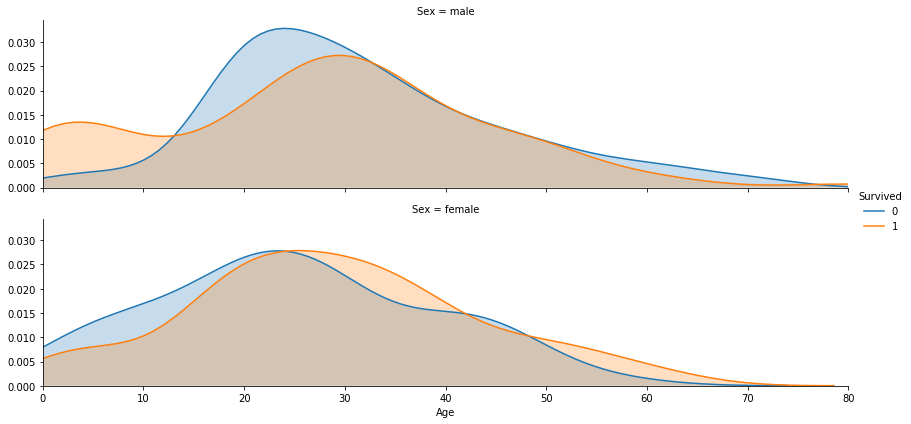

In [527]:
plot_distribution(original_train, var='Age', target='Survived', row='Sex')

### 3.1.2 Fare

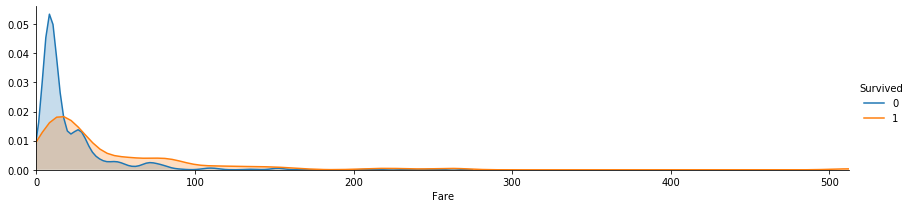

In [528]:
plot_distribution(original_train, var='Fare', target='Survived')

## 3.2 Categorial Variables

### 3.2.1 Embarked

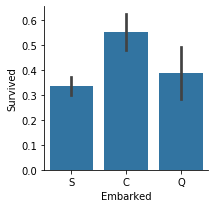

In [529]:
plot_categories(original_train, cat='Embarked', target='Survived')

### 3.2.2 Sex

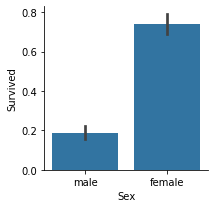

In [530]:
plot_categories(original_train, cat='Sex', target='Survived')

### 3.2.3 Pclass

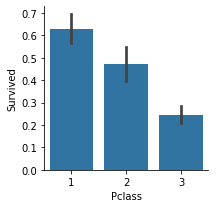

In [531]:
plot_categories(original_train, cat='Pclass', target='Survived')

### 3.2.4 SibSp

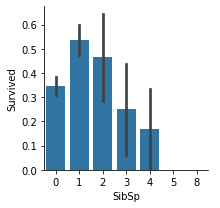

In [532]:
plot_categories(original_train, cat='SibSp', target='Survived')

### 3.2.5 Parch

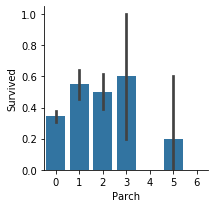

In [533]:
plot_categories(original_train, cat='Parch', target='Survived')

## 4. Data Cleaning 

## 4.1 One Hot Encoding

In [534]:
# To convert categorial data to numeric data, I choose to use One Hot Encoding.

def ohe_with_dataframe(data, col):
    
    """
    One-hot-encodes given column.
    
    Input: data - target dataframe
            col - target column
            
    Output: dataframe with target column one-hot-encoded
    """
    
    # Initialize DictVec
    vec_enc = DictVectorizer()
    vec_enc.fit(data[[col]].to_dict(orient='records'))

    # Convert categorial data to numerical data array
    col_data = vec_enc.transform(data[[col]].to_dict(orient='records')).toarray()
    
    # Get feature names (unique values in that column)
    col_cats = vec_enc.get_feature_names()
    
    # Create a dataframe with ohe columns
    col = pd.DataFrame(col_data, columns=col_cats)

    # Reset the index to avoid creating empty rows
    data = data.reset_index()
    
    # Combine by INDEX start from 0
    data = pd.concat([data, col], axis=1)
    
    return data

def ohe(data, col):
    
    """
    One-hot-encodes given column.
    
    Input: data - target dataframe
            col - target column
            
    Output: Only ohe-d target column
    """
    
    vec_enc = DictVectorizer()
    vec_enc.fit(data[[col]].to_dict(orient='records'))
    col_data = vec_enc.transform(data[[col]].to_dict(orient='records')).toarray()
    col_cats = vec_enc.get_feature_names()
    col = pd.DataFrame(col_data, columns=col_cats)
    
    return col

ohe_with_dataframe(original_train, 'Embarked').head()
# ohe(original_train, 'Embarked').head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked,Embarked=C,Embarked=Q,Embarked=S
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,0.0,0.0,1.0
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0,1.0,0.0,0.0
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,0.0,0.0,1.0
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0,0.0,0.0,1.0
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,0.0,0.0,1.0


In [535]:
# # Transform Sex into binary values 0 and 1
# sex = pd.Series(np.where(full.Sex == 'male', 1, 0) , name = 'Sex')
# sex

In [536]:
# # Create a new variable for every unique value of Embarked
# embarked = pd.get_dummies(original_train.Embarked, prefix='Embarked')
# embarked.head()

## 4.2 Fill missing values

In [537]:
original_train = pd.read_csv('train.csv')

In [538]:
# We first deal with null values in our dataframe

def null_columns(df):
    """
    Prints the column name if this column contains NaN.
    
    Input: df - target dataframe
    Output: column names
    
    """
    for col in df.columns:
        if df.isna()[col].any():
            print(col, type(col))

print('Train contains NaN in the following columns: ')
null_columns(original_train)

Train contains NaN in the following columns: 
Age <class 'str'>
Cabin <class 'str'>
Embarked <class 'str'>


In [539]:
print('Test contains NaN in the following columns: ')
null_columns(test)

Test contains NaN in the following columns: 
Age <class 'str'>
Fare <class 'str'>
Cabin <class 'str'>


In [540]:
# We see multiple columns contain NaN. Let's fix them one by one.

# 1. Age
original_train['Age'].unique() # Check what the data looks like

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [541]:
# 2. Cabin
original_train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [542]:
# 3. Embarked
original_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [543]:
# 4. Fare
test['Fare'].unique()

array([  7.8292,   7.    ,   9.6875,   8.6625,  12.2875,   9.225 ,
         7.6292,  29.    ,   7.2292,  24.15  ,   7.8958,  26.    ,
        82.2667,  61.175 ,  27.7208,  12.35  ,   7.225 ,   7.925 ,
        59.4   ,   3.1708,  31.6833,  61.3792, 262.375 ,  14.5   ,
        61.9792,  30.5   ,  21.6792,  31.5   ,  20.575 ,  23.45  ,
        57.75  ,   8.05  ,   9.5   ,  56.4958,  13.4167,  26.55  ,
         7.85  ,  13.    ,  52.5542,  29.7   ,   7.75  ,  76.2917,
        15.9   ,  60.    ,  15.0333,  23.    , 263.    ,  15.5792,
        29.125 ,   7.65  ,  16.1   ,  13.5   ,   7.725 ,  21.    ,
         7.8792,  42.4   ,  28.5375, 211.5   ,  25.7   ,  15.2458,
       221.7792,  10.7083,  14.4542,  13.9   ,   7.775 ,  52.    ,
         7.7958,  78.85  ,   7.8542,  55.4417,   8.5167,  22.525 ,
         7.8208,   8.7125,  15.0458,   7.7792,  31.6792,   7.2833,
         6.4375,  16.7   ,  75.2417,  15.75  ,   7.25  ,  23.25  ,
        28.5   ,  25.4667,  46.9   , 151.55  ,  18.    ,  51.8

In [623]:
def fix_na(data):
    # We fill NaN in age with mean age
    data['Age'] = data['Age'].fillna(np.mean(full_data['Age']))
    
    # We fill NaN in cabin with U
    data['Cabin'] = data['Cabin'].fillna('U')
    
    # We fill NaN in Embarked with U for unknown
    data['Embarked'] = data['Embarked'].fillna('U')
    
    # We fill NaN in Fare with mean fare
    data['Fare'] = data['Fare'].fillna(np.mean(full_data['Fare']))
    
    return data

fixed_train = fix_na(original_train.copy())
fixed_test = fix_na(test.copy())

## 5. Model Training

## 5.1 Feature Engineering

## 5.1.1 Name

We have explored and cleaned all quantitaive data. Now let's explore nominal data, which is Name.

In [624]:
original_train['Name'].values

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

We can see that there are different prefixes. They reflect to social status and may affect the survivability.

In [625]:
# Use Regex to extract all titles

import re

pattern = r"(\w+)\."
text = ''.join(original_train['Name'].values)

titles = pd.Series(re.findall(pattern, text))
titles

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
887     Rev
888    Miss
889    Miss
890      Mr
891      Mr
Length: 892, dtype: object

In [626]:
# Check all kinds of titles

titles.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'L', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [627]:
# a map of more aggregated titles
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "Countess":   "Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty",
                    "L" :      "Royalty"
                    }

In [628]:
# Map each prefix to a category

titles = pd.Series(titles).map(Title_Dictionary)
titles.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Royalty', 'Officer'], dtype=object)

## 5.1.2 Ticket Class

In [629]:
original_train['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [630]:
# Extract the prefix of each ticket. If the ticket only contains digit, return 'N'

def ticket_prefix(ticket_lst):
    prefix = []
    for t in ticket_lst:
        ticket = t.replace('.', '').replace('/', '').split()
        for i in ticket:
            try:
                int(i)
                prefix.append('N')
                break
            except ValueError:
                prefix.append(i)
                break
    return prefix
    
tp = pd.Series(ticket_prefix(original_train['Ticket']))
tp

0          A5
1          PC
2      STONO2
3           N
4           N
        ...  
886         N
887         N
888        WC
889         N
890         N
Length: 891, dtype: object

## 5.1.3 Family Size

SibSp tells us the number of siblings, and Parch tells us the number of parents on board. Based on these information, we can define different sizes of family.

In [631]:
fam_count = fixed_train['SibSp'] + fixed_train['Parch']

# We define 0 as single, 1-3 as small family, >4 as large family
def fam_size(ct):
    if ct == 0:
        return 'Single'
    elif ct > 0 and ct <= 3:
        return 'Small'
    else:
        return 'Large'

fam_count = fam_count.map(fam_size)
fam_count

0       Small
1       Small
2      Single
3       Small
4      Single
        ...  
886    Single
887    Single
888     Small
889    Single
890    Single
Length: 891, dtype: object

## 5.2 Select Variables

It's time to fit our updated logistic regression model which consists of numeric variables and our one-hot-encoded variables.

In [632]:
# Helper Function for creating final dataframe for model training

def process_data(data, features):
    """Process the data for a guided model."""
    
    try:
        final_data = data[['Survived']]
    except:
        final_data = pd.DataFrame()
    
    # Pre-process data
    # Prefix
    pattern = r"(\w+)\."
    text = ''.join(data['Name'].values)
    titles = pd.Series(re.findall(pattern, text))
    titles = pd.Series(titles).map(Title_Dictionary)
    data['Title'] = titles
    
    # Ticket prefix
    tp = pd.Series(ticket_prefix(data['Ticket']))
    data['Ticket'] = tp
    
    # Family size
    fam_count = data['SibSp'] + data['Parch']
    fam_count = fam_count.map(fam_size)
    data['Family'] = fam_count
    
    # One-hot-encode features
    numeric = ['Pclass', 'Age', 'Fare']
    for f in features:
        if f in numeric:
            final_data = pd.concat([final_data, data[f]], axis=1)
            continue
        try:
            final_data = pd.concat([final_data, ohe(data, f)], axis=1)
        except:
            print('Feature ', f, ' is not available!')
    
    # return the final dataframe
    return final_data

The following variables are available for model training:
- Pclass
- Title
- Sex
- Age
- Family
- Ticket *
- Fare
- Cabin *
- Embarked *

In [687]:
# Select different features 

features = ['Pclass', 'Title', 'Sex', 'Age', 'Family', 'Fare']
final_df = process_data(fixed_train, features)
print(final_df.drop('Survived', axis=1).shape)
final_df.head()

(891, 14)


,Survived,Pclass,Title=Master,Title=Miss,Title=Mr,Title=Mrs,Title=Officer,Title=Royalty,Sex=female,Sex=male,Age,Family=Large,Family=Single,Family=Small,Fare
0,0,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,22.0,0.0,0.0,1.0,7.2500
1,1,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,38.0,0.0,0.0,1.0,71.2833
2,1,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,26.0,0.0,1.0,0.0,7.9250
3,1,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35.0,0.0,0.0,1.0,53.1000
4,0,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,35.0,0.0,1.0,0.0,8.0500


In [688]:
# Split our data to train and test

from sklearn.model_selection import train_test_split
train, val = train_test_split(final_df, test_size=0.1, random_state=42)
pd.set_option('display.max_columns', 500)
train.head()

,Survived,Pclass,Title=Master,Title=Miss,Title=Mr,Title=Mrs,Title=Officer,Title=Royalty,Sex=female,Sex=male,Age,Family=Large,Family=Single,Family=Small,Fare
165,1,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.000000,0.0,0.0,1.0,20.5250
541,0,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,9.000000,1.0,0.0,0.0,31.2750
625,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,61.000000,0.0,1.0,0.0,32.3208
388,0,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,29.881138,0.0,1.0,0.0,7.7292
76,0,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,29.881138,0.0,1.0,0.0,7.8958


In [689]:
X_train, Y_train = train.drop(['Survived'], axis=1), train['Survived']
X_val, Y_val = val.drop(['Survived'], axis=1), val['Survived']

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)
print('Training accuracy: ', model.score(X_train,Y_train))
print('Testing accuracy: ', model.score(X_val,Y_val))

Training accuracy:  0.8177278401997503
Testing accuracy:  0.8333333333333334


## 6. Evaluation

In [690]:
# Predict the real data

final_test = process_data(fixed_test, features)
print(final_test.shape)
final_test.head()

(418, 14)


,Pclass,Title=Master,Title=Miss,Title=Mr,Title=Mrs,Title=Officer,Title=Royalty,Sex=female,Sex=male,Age,Family=Large,Family=Single,Family=Small,Fare
0,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,34.5,0.0,1.0,0.0,7.8292
1,3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,47.0,0.0,0.0,1.0,7.0000
2,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,62.0,0.0,1.0,0.0,9.6875
3,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,27.0,0.0,1.0,0.0,8.6625
4,3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,22.0,0.0,0.0,1.0,12.2875


In [691]:
test_predictions = model.predict(final_test)

In [692]:
from datetime import datetime

# Construct and save the submission:
submission_df = pd.DataFrame({
    "PassengerId": test['PassengerId'], 
    "Survived": test_predictions,
}, columns=['PassengerId', 'Survived'])
timestamp = datetime.isoformat(datetime.now()).split(".")[0]
submission_df.to_csv("submission_{}.csv".format(timestamp), index=False)

print('Created a CSV file: {}.'.format("submission_{}.csv".format(timestamp)))
print('You may now upload this CSV file to Kaggle for scoring.')

Created a CSV file: submission_2020-06-15T17:14:57.csv.
You may now upload this CSV file to Kaggle for scoring.
